In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from regressors import stats
from sklearn.linear_model import LogisticRegressionCV as LRCV, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold
from sklearn.pipeline import make_pipeline
from regressors import stats

In [2]:
np.random.seed(123)

# Problem 1

### Data Generation

In [3]:
arr = np.array([[np.random.uniform(-1,1) for i in range(1000)] for j in range(50)])

In [4]:
df = pd.DataFrame(arr)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.392938,-0.427721,-0.546297,0.102630,0.438938,-0.153787,0.961528,0.369659,-0.038136,-0.215765,...,-0.073284,-0.883226,0.077316,-0.707929,0.268170,-0.471205,0.381831,-0.305708,-0.991663,-0.410211
1,-0.836211,-0.009921,-0.422220,0.279984,-0.000128,-0.927910,-0.362732,-0.021882,0.144408,-0.790257,...,0.431159,0.584337,0.652559,0.540061,0.380856,-0.613975,0.463301,-0.450577,0.443635,-0.804274
2,-0.153968,-0.213963,-0.926598,0.768039,0.352960,0.556515,0.331442,-0.314000,0.013588,-0.742509,...,-0.545743,0.013392,-0.249211,0.008112,-0.461449,0.220235,0.243973,-0.582165,0.134944,-0.109569
3,0.938852,0.443567,-0.636217,0.764057,-0.045957,0.693714,0.661815,-0.965299,-0.532676,0.822183,...,-0.229259,0.528065,0.143618,0.235813,-0.664904,0.103549,0.089398,0.475035,0.406200,0.245757
4,-0.682005,0.937566,0.218337,-0.672491,0.608307,-0.717667,-0.458174,0.125900,-0.695532,-0.826452,...,-0.011333,0.946683,-0.489144,-0.841033,0.685729,0.003297,-0.285188,-0.136751,0.885420,-0.912014


### Adding Class Markers

In [6]:
c = [np.random.randint(0,2) for i in range(50)]

In [7]:
df['class'] = c

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,class
0,0.392938,-0.427721,-0.546297,0.102630,0.438938,-0.153787,0.961528,0.369659,-0.038136,-0.215765,...,-0.883226,0.077316,-0.707929,0.268170,-0.471205,0.381831,-0.305708,-0.991663,-0.410211,1
1,-0.836211,-0.009921,-0.422220,0.279984,-0.000128,-0.927910,-0.362732,-0.021882,0.144408,-0.790257,...,0.584337,0.652559,0.540061,0.380856,-0.613975,0.463301,-0.450577,0.443635,-0.804274,0
2,-0.153968,-0.213963,-0.926598,0.768039,0.352960,0.556515,0.331442,-0.314000,0.013588,-0.742509,...,0.013392,-0.249211,0.008112,-0.461449,0.220235,0.243973,-0.582165,0.134944,-0.109569,1
3,0.938852,0.443567,-0.636217,0.764057,-0.045957,0.693714,0.661815,-0.965299,-0.532676,0.822183,...,0.528065,0.143618,0.235813,-0.664904,0.103549,0.089398,0.475035,0.406200,0.245757,0
4,-0.682005,0.937566,0.218337,-0.672491,0.608307,-0.717667,-0.458174,0.125900,-0.695532,-0.826452,...,0.946683,-0.489144,-0.841033,0.685729,0.003297,-0.285188,-0.136751,0.885420,-0.912014,0


### Choosing Correlated Predictors

In [9]:
# This returns the correllation of every variable with the class marker (including class itself with a correlation of 1)
cor = df.corr().loc['class',:]

There are zero predictors (excluding class with a correlation of 1) that have a correlation $\ge 0.50$.

In [10]:
len(cor[cor.abs() >= 0.5])

1

Through trial and error I discovered that exactly 50 predictors (excluding class) have a correlation $\ge 0.2853$ so these will be the 50 predictors that I will use.

In [11]:
len(cor[cor.abs() >= 0.2853])

51

In [12]:
# all 50 chosen predictors
preds = cor[cor.abs() >= 0.2853][:-1]

In [13]:
# indices of chosen predictors + class (corresponding to column of the DataFrame)
chosen = list(preds.index)

In [14]:
len(chosen)

50

In [15]:
X = df.loc[:,chosen]

In [16]:
X.shape

(50, 50)

In [17]:
y = df.loc[:,"class"]

In [18]:
y.shape

(50,)

### Model Training

In [19]:
model = LRCV(cv = 5).fit(X,y)

### Estimated test error

I used the model score which is the proportion of correct predictions averaged over all of the crossvalidation steps to calculated the estimated test error. This estimated near perfect prediction with an error of only 2%.

In [20]:
print("\nThe estimated test error: ",round(1-model.score(X,y),4))


The estimated test error:  0.02


### Data Generation (Test set)
I would expect the actual test error to be much lower (likely 50%) so to test this I generated a testing in the exact same way as the training data without resetting the seed. Then I can see how the model performs on the 50 most correlated variables from this set as well as the data from the columns used to train the model because there should be no guarantee that the best predictors in the first set are the best predictors for the second.

In [21]:
arr2 = np.array([[np.random.uniform(-1,1) for i in range(1000)] for j in range(50)])

In [22]:
df2 = pd.DataFrame(arr2)

In [23]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.538252,-0.030956,-0.446332,-0.467406,-0.535048,-0.443504,-0.150983,-0.779912,0.335208,0.499239,...,-0.208983,-0.573543,-0.607929,-0.068793,-0.678454,0.557892,-0.333676,-0.903262,0.743485,0.570385
1,-0.627637,-0.607606,0.325883,0.815414,-0.885176,0.737653,-0.045355,-0.774557,-0.616945,-0.535096,...,0.518480,-0.683186,-0.297481,-0.674904,0.346656,0.741484,0.495606,-0.272584,0.140784,-0.034379
2,-0.595599,-0.832299,0.841999,-0.003383,0.966023,-0.523947,-0.454031,0.471007,-0.160582,-0.020579,...,-0.200261,0.489633,0.357920,0.804157,0.619011,0.369197,-0.274946,-0.627865,0.652312,0.006655
3,0.929054,-0.128504,0.183159,-0.887731,0.302255,0.561635,0.881414,0.331947,0.113955,0.202942,...,0.662654,0.727683,0.242081,0.159884,0.168873,0.852190,0.146076,0.151956,0.510998,0.516571
4,-0.771568,-0.032992,0.356966,0.792431,0.581706,0.271162,-0.911384,-0.570173,0.640641,-0.077466,...,0.642708,-0.378193,0.589274,0.987445,-0.506934,-0.026494,0.668174,0.424575,-0.563916,0.232473


### Adding Class Markers (Test Set)

In [24]:
c2 = [np.random.randint(0,2) for i in range(50)]

In [25]:
df2['class'] = c2

In [26]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,class
0,0.538252,-0.030956,-0.446332,-0.467406,-0.535048,-0.443504,-0.150983,-0.779912,0.335208,0.499239,...,-0.573543,-0.607929,-0.068793,-0.678454,0.557892,-0.333676,-0.903262,0.743485,0.570385,0
1,-0.627637,-0.607606,0.325883,0.815414,-0.885176,0.737653,-0.045355,-0.774557,-0.616945,-0.535096,...,-0.683186,-0.297481,-0.674904,0.346656,0.741484,0.495606,-0.272584,0.140784,-0.034379,1
2,-0.595599,-0.832299,0.841999,-0.003383,0.966023,-0.523947,-0.454031,0.471007,-0.160582,-0.020579,...,0.489633,0.357920,0.804157,0.619011,0.369197,-0.274946,-0.627865,0.652312,0.006655,0
3,0.929054,-0.128504,0.183159,-0.887731,0.302255,0.561635,0.881414,0.331947,0.113955,0.202942,...,0.727683,0.242081,0.159884,0.168873,0.852190,0.146076,0.151956,0.510998,0.516571,0
4,-0.771568,-0.032992,0.356966,0.792431,0.581706,0.271162,-0.911384,-0.570173,0.640641,-0.077466,...,-0.378193,0.589274,0.987445,-0.506934,-0.026494,0.668174,0.424575,-0.563916,0.232473,0


### Choosing Correlated Predictors (Test Set)

In [27]:
# This returns the correllation of every variable with the class marker (including class itself with a correlation of 1)
cor2 = df2.corr().loc['class',:]

There are zero predictors (excluding class with a correlation of 1) that have a correlation $\ge 0.50$.

In [28]:
len(cor2[cor2.abs() >= 0.5])

1

Through trial and error I discovered that exactly 50 predictors (excluding class) have a correlation $\ge 0.275$ so these will be the 50 predictors that I will use.

In [29]:
len(cor2[cor2.abs() >= 0.275])

51

In [30]:
# all 50 chosen predictors
preds2 = cor2[cor2.abs() >= 0.275][:-1]

In [31]:
# indices of chosen predictors + class (corresponding to column of the DataFrame)
chosen2 = list(preds2.index)

In [32]:
len(chosen2)

50

## Prediction with original predictors

In [33]:
X1 = df2.loc[:,chosen]

In [34]:
X1.shape

(50, 50)

In [35]:
y1 = df2.loc[:,"class"]

In [36]:
y1.shape

(50,)

In [37]:
prediction1 = model.predict(X1)

In [38]:
print(confusion_matrix(y1, prediction1))

[[22  6]
 [15  7]]


Actual Test Error

In [39]:
print(classification_report(y1, prediction1))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68        28
           1       0.54      0.32      0.40        22

    accuracy                           0.58        50
   macro avg       0.57      0.55      0.54        50
weighted avg       0.57      0.58      0.56        50



The test error for the original predictors but with new (similarly generated) data was much higher (0.43).

## Prediction with new most correlated predictors

In [40]:
X2 = df2.loc[:,chosen2]

In [41]:
X2.shape

(50, 50)

In [42]:
y2 = df2.loc[:,"class"]

In [43]:
y2.shape

(50,)

In [44]:
prediction2 = model.predict(X2)

In [45]:
print(confusion_matrix(y2, prediction2))

[[19  9]
 [14  8]]


Actual Test Error

In [46]:
print(classification_report(y2, prediction2))

              precision    recall  f1-score   support

           0       0.58      0.68      0.62        28
           1       0.47      0.36      0.41        22

    accuracy                           0.54        50
   macro avg       0.52      0.52      0.52        50
weighted avg       0.53      0.54      0.53        50



Even with the 50 most correlated predictors for this dataset the model had a higher error than expected (0.52). As expected, even though the model predicted that the test error would be near perfect, the actual accuracy of the model is only 50%.  The correct way would be to apply cross validation to the entire process.  The folds would be created initally before any filtering or cherry picking was performed and then the process would be applied to all fold identically.

# Problem 2

### A

In [47]:
X_trains = []
y_trains = []
for i in range(2):
    x = pd.Series([np.random.uniform(0,5) for x in range(15)])
    y = x**3 - 5*x**2 + x + 2
    y = y.map(lambda x: x + np.random.normal(loc = 0, scale = 2))
    y_trains.append(list(y))
    X_trains.append(list(x))

## B

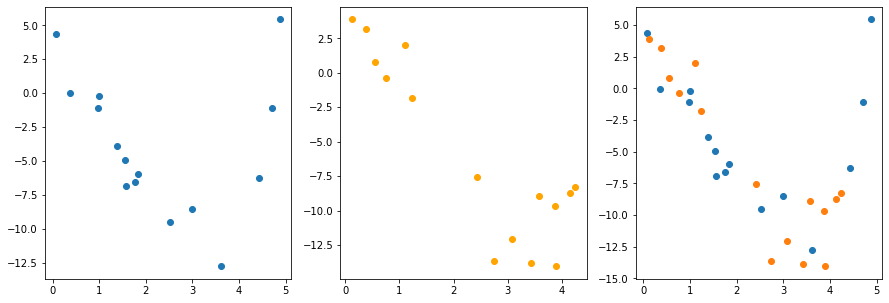

In [48]:
fig, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for xs,ys in zip(X_trains,y_trains):
    ax3.scatter(xs,ys)
ax1.scatter(X_trains[0],y_trains[0])
ax2.scatter(X_trains[1],y_trains[1],c='orange')

Looking at the scatter plots of the data, training set 2 (in orange) seems to be more linear.  I would expect a lower degree polynomial to fit set 2 better and a higher degree polynomial to fit set 1 better even though both are created using the same function.

## C

In [49]:
models = pd.DataFrame(columns = ['set','model','degree','train_MSE'])
plot_data1 = pd.DataFrame(columns=['degree','x','y'])
plot_data2 = pd.DataFrame(columns=['degree','x','y'])
lm = LinearRegression(copy_X = True)
st = []

c = 0
for X,y in zip(X_trains,y_trains):
    c += 1
    for i in [1,2,3,4,5]:
        model = make_pipeline(PolynomialFeatures(degree = i), LinearRegression(copy_X=True))
        model.fit(np.array(X).reshape(-1,1), np.array(y).reshape(-1,1))
        
        loo = LeaveOneOut()
        crossvalidation = loo.get_n_splits(X)
        
        scores = cross_val_score(model, np.array(X).reshape(-1,1), np.array(y).reshape(-1,1), scoring="neg_mean_squared_error", cv=LeaveOneOut(), n_jobs=1)
        mse = np.mean(np.abs(scores))
        models = models.append({'set':c, 'model':model, 'degree':i, 'train_MSE':mse}, ignore_index = True)
        
        
        if c == 1:
            poly = PolynomialFeatures(i)
            polyx = poly.fit_transform(np.array(X).reshape(-1,1))
            pred = model[1].predict(polyx)
            for xs,ys,true in zip(X, pred.reshape(1,-1)[0],y):
                plot_data1 = plot_data1.append({'degree':i,'x':xs,'y':ys,'true':true}, ignore_index=True)
                
        if c == 2:
            poly = PolynomialFeatures(i)
            polyx = poly.fit_transform(np.array(X).reshape(-1,1))
            pred = model[1].predict(polyx)
            for xs,ys,true in zip(X, pred.reshape(1,-1)[0],y):
                plot_data2 = plot_data2.append({'degree':i,'x':xs,'y':ys,'true':true}, ignore_index=True)
                
plot_data1 = plot_data1.sort_values(by=['degree','x'])
plot_data2 = plot_data2.sort_values(by=['degree','x'])

## D

As can be seen below, these charts compare the predictions for one data point over all 5 models and, for this point, both sets had the most accurate predictions with a 4th degree polynomial.

In [50]:
plot_data1.groupby('degree').first()

,x,y,true
degree,,,
1.0,0.077333,-2.619262,4.368445
2.0,0.077333,5.854607,4.368445
3.0,0.077333,2.808205,4.368445
4.0,0.077333,4.101857,4.368445
5.0,0.077333,3.433951,4.368445


In [51]:
plot_data2.groupby('degree').first()

,x,y,true
degree,,,
1.0,0.117165,2.643451,3.880601
2.0,0.117165,5.806187,3.880601
3.0,0.117165,3.166744,3.880601
4.0,0.117165,3.421468,3.880601
5.0,0.117165,4.166571,3.880601


## E

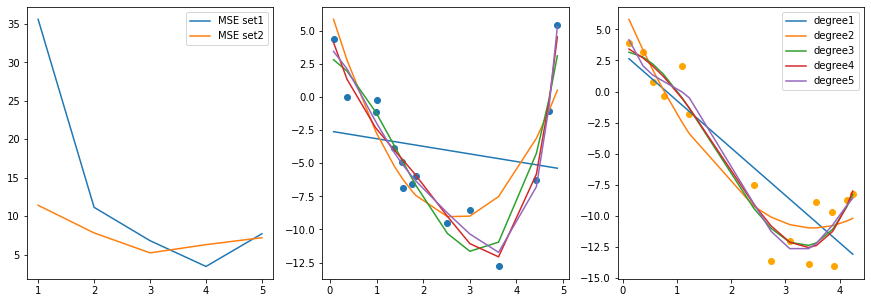

In [52]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in [1,2]:
    x = models.loc[models['set']==i, 'degree']
    y = models.loc[models['set']==i, 'train_MSE']
    ax1.plot(x,y,label='MSE set'+str(i))
ax1.legend()

ax2.scatter(X_trains[0],y_trains[0])
for i in [1,2,3,4,5]:
    x = plot_data1.loc[plot_data1['degree']==i, 'x']
    y = plot_data1.loc[plot_data1['degree']==i, 'y']
    ax2.plot(x,y,label="degree"+str(i))

    
ax3.scatter(X_trains[1],y_trains[1],c="orange")
for i in [1,2,3,4,5]:
    x = plot_data2.loc[plot_data2['degree']==i, 'x']
    y = plot_data2.loc[plot_data2['degree']==i, 'y']
    ax3.plot(x,y,label="degree"+str(i))
ax3.legend()

For training set 1 the best fit overall was found using the fourth degree polynomial while the best fit for training set 2 was found using the 3rd degree polynomial. This is exactly what I expected from analysing the scatter plots. The general trend of the second training set seemed more linear while training set 1 was more parabolic.

In [53]:
models.groupby(['degree','set']).mean()

train_MSE
degree set           
1      1    35.590937
       2    11.420456
2      1    11.158414
       2     7.832166
3      1     6.820551
       2     5.238768
4      1     3.473110
       2     6.307269
5      1     7.725682
       2     7.210262

## F

Regardless of how I reshaped my data I was unable to get the summary to print.  If given the opportunity I will continue to debug this and then I could comment on the effect of the statistical significance on the estimates.

In [54]:
models

,set,model,degree,train_MSE
0,1,"(PolynomialFeatures(degree=1), LinearRegressio...",1,35.590937
1,1,"(PolynomialFeatures(), LinearRegression())",2,11.158414
2,1,"(PolynomialFeatures(degree=3), LinearRegressio...",3,6.820551
3,1,"(PolynomialFeatures(degree=4), LinearRegressio...",4,3.473110
4,1,"(PolynomialFeatures(degree=5), LinearRegressio...",5,7.725682
5,2,"(PolynomialFeatures(degree=1), LinearRegressio...",1,11.420456
6,2,"(PolynomialFeatures(), LinearRegression())",2,7.832166
7,2,"(PolynomialFeatures(degree=3), LinearRegressio...",3,5.238768
8,2,"(PolynomialFeatures(degree=4), LinearRegressio...",4,6.307269
9,2,"(PolynomialFeatures(degree=5), LinearRegressio...",5,7.210262


In [55]:
m = models.loc[1,'model'][1]

In [56]:
m.rank_

2

In [58]:
X

[3.0819297637717,
 3.430675896273118,
 3.8944860568881556,
 2.738915559581254,
 4.1371711074631445,
 1.0999930783766643,
 0.11716470208533225,
 3.5721510731353847,
 0.7547868909192329,
 4.24414456712875,
 0.5539610459635957,
 0.37447420350314564,
 2.421366929845701,
 1.2314715388719804,
 3.866788928945804]

In [116]:
mods = models.loc[:,"model"]
m = mods[1][1]

In [117]:
m.rank_

2

In [118]:
X =  np.array(X)

In [119]:
X = X.reshape(-1,1)

In [120]:
X

array([[3.08192976],
       [3.4306759 ],
       [3.89448606],
       [2.73891556],
       [4.13717111],
       [1.09999308],
       [0.1171647 ],
       [3.57215107],
       [0.75478689],
       [4.24414457],
       [0.55396105],
       [0.3744742 ],
       [2.42136693],
       [1.23147154],
       [3.86678893]])

In [121]:
poly = PolynomialFeatures(2)
polyx = poly.fit_transform(X)

In [122]:
polyx

array([[1.00000000e+00, 3.08192976e+00, 9.49829107e+00],
       [1.00000000e+00, 3.43067590e+00, 1.17695371e+01],
       [1.00000000e+00, 3.89448606e+00, 1.51670216e+01],
       [1.00000000e+00, 2.73891556e+00, 7.50165844e+00],
       [1.00000000e+00, 4.13717111e+00, 1.71161848e+01],
       [1.00000000e+00, 1.09999308e+00, 1.20998477e+00],
       [1.00000000e+00, 1.17164702e-01, 1.37275674e-02],
       [1.00000000e+00, 3.57215107e+00, 1.27602633e+01],
       [1.00000000e+00, 7.54786891e-01, 5.69703251e-01],
       [1.00000000e+00, 4.24414457e+00, 1.80127631e+01],
       [1.00000000e+00, 5.53961046e-01, 3.06872840e-01],
       [1.00000000e+00, 3.74474204e-01, 1.40230929e-01],
       [1.00000000e+00, 2.42136693e+00, 5.86301781e+00],
       [1.00000000e+00, 1.23147154e+00, 1.51652215e+00],
       [1.00000000e+00, 3.86678893e+00, 1.49520566e+01]])

In [123]:
polyx.shape

(15, 3)

In [124]:
type(polyx)

numpy.ndarray

In [125]:
xlabels = np.array(['intercept', 'X1','X2'])

In [126]:
xlabels.shape

(3,)

In [127]:
type(xlabels)

numpy.ndarray

In [128]:
y = np.array(y)

In [129]:
y.shape

(15,)

In [130]:
type(y)

numpy.ndarray

In [132]:
stats.summary(m, polyx, y)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 3

In [138]:
X

array([[3.08192976],
       [3.4306759 ],
       [3.89448606],
       [2.73891556],
       [4.13717111],
       [1.09999308],
       [0.1171647 ],
       [3.57215107],
       [0.75478689],
       [4.24414457],
       [0.55396105],
       [0.3744742 ],
       [2.42136693],
       [1.23147154],
       [3.86678893]])

In [157]:
xlabels = ['intercept']

In [158]:
xlabels

['intercept']

In [161]:
xlabels.extend(["X1","X2"])

In [162]:
xlabels

['intercept', ['X1', 'X2'], 'X1', 'X2']

In [166]:
for i in [1,2,3,4,5]:
    xlabels = ["intercept"]
    xlabels.extend(["X"+str(x+1) for x in range(i)])
    print(xlabels)

['intercept', 'X1']
['intercept', 'X1', 'X2']
['intercept', 'X1', 'X2', 'X3']
['intercept', 'X1', 'X2', 'X3', 'X4']
['intercept', 'X1', 'X2', 'X3', 'X4', 'X5']


In [173]:
for i in [1,2,3,4,5]:
    poly = PolynomialFeatures(i)
    polyx = poly.fit_transform(X)
    m = lm.fit(polyx,y)
    xlabels = ["intercept"]
    xlabels.extend(["X^"+str(x+1) for x in range(i)])
    xlabels = np.array(xlabels)
    print(m)
    print(xlabels)
    print(polyx.shape,'\n', y)
    print(stats.summary(m, polyx, y, xlabels))

LinearRegression()
['intercept' 'X^1']
(15, 2) 
 [  4.16657075   2.07592774   1.33924943   0.82501129  -0.03863909
  -0.50746754  -9.02056552 -11.2334927  -12.61949145 -12.6162001
 -12.20327    -10.75156447 -10.58754     -9.12860075  -8.56586288]


LinAlgError: Singular matrix

# Problem 3

In [ ]:
boston = pd.read_csv('boston.csv', index_col=0)

In [ ]:
boston.head()

### (a)

In [ ]:
mu_hat = boston.loc[:,'medv'].mean()

In [ ]:
mu_hat

### (b)

In [ ]:
medv = boston.loc[:,'medv']

In [ ]:
np.std(medv)/np.sqrt(len(medv))

This value represents the accuracy to which to sample was able to infer the population mean.

### (c)

In [ ]:
def bootstrap(series,func=np.mean, *args):
    boots = []
    for i in range(10000):
        indices = [np.random.randint(len(series)) for x in range(int(len(series)/3))]
        sample = series.iloc[indices]
        boots.append(func(sample, *args))
    
    sns.histplot(boots)
    plt.title("Dist. of Bootstrap estimate")
    return(boots)

In [ ]:
def sd_err(series):
    return(np.std(series)/np.sqrt(len(series)))

In [ ]:
boots = bootstrap(medv, sd_err)

Distribution of the bootstrap estimates for Standard error.

In [ ]:
SE = np.mean(boots)
print("\nBootstrap estimate of the standard error: " + str(SE))

The standard error calculated via boot strap was larger than the for the direct calculation.

### (d)

In [ ]:
boot_means = bootstrap(medv)

Distribution of Bootstrap estimates for the mean.

In [ ]:
mu = np.mean(boot_means)
print("\n95% confidence interval of bootstrap estimate of the mean: " + str((mu-1.96*(SE),mu+1.96*(SE))))

```
	One Sample t-test

data:  Boston$medv
t = 55.111, df = 505, p-value <
2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 

```

The cofidence interval was much wider using the bootstrap estimate than with using the t.test() function.  This agrees with the earlier statements about the value of the standard error.

### (e)

In [ ]:
dmed = np.median(medv)
print("Direct estimate of the median: ",dmed)

### (f)

In [ ]:
boot_meds = bootstrap(medv, np.median)

Distribution of Bootstrap estimates for the median.

In [ ]:
med = np.mean(boot_meds)
print("\nBootstrap estimate of the median: " + str(med))

In [ ]:
SE_med = np.std(boot_meds)/np.sqrt(len(boot_meds))
print("\nBootstrap estimate of Standard Error of the median: ",SE_med)

The distribution of the bootstrap estimates for median were not as normal as the distributions for mean or standard error.  The standard error for the mean calculated via bootstrap was very small (0.006).

### (h)

In [ ]:
p10 = np.percentile(medv, 10)
print("\nDirect estimate of the 10th percentile: ",p10)

### (g)

In [ ]:
boot_p10s = bootstrap(medv, np.percentile, 10)

In [ ]:
bp10 = np.mean(boot_p10s)
print("\nBootstrap estimate of the 10th percentile: ",bp10)

Again, the distribution of the bootstrap estimate was not very even and seems to be skewed left.  The estimate is very close to the direct estimate taken from the full sample.